Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Open file with pd.read_csv

In [2]:

df = pd.read_csv('C:/Users/hp/Documents/MiniProject_ML/Churn_Modelling.csv')

In [3]:
print ("Shape of dataset (rows, columns)",df.shape)

Shape of dataset (rows, columns) (10000, 14)


In [4]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [5]:
# print head of data set
print("\n **************First 5 rows of dataset**********\n",df.head())


 **************First 5 rows of dataset**********
    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57  

In [6]:
dff = df.drop('RowNumber',axis=1)
dff = dff.drop('CustomerId',axis=1)
dff = dff.drop('Surname',axis=1)
dff.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
for label in dff.columns:
    dff[label]=LabelEncoder().fit_transform(dff[label])

In [8]:
dff.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228,0,0,24,2,0,0,1,1,5068,1
1,217,2,0,23,1,743,0,0,1,5639,0
2,111,0,0,24,8,5793,2,1,0,5707,1
3,308,0,0,21,1,0,1,0,0,4704,0
4,459,2,0,25,2,3696,0,1,1,3925,0


In [9]:
X = dff.drop('Exited', axis=1)
y = dff['Exited']
print("\n Features set\n",X.head())
print ("\n Target labels\n",y.head())


 Features set
    CreditScore  Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          228          0       0   24       2        0              0   
1          217          2       0   23       1      743              0   
2          111          0       0   24       8     5793              2   
3          308          0       0   21       1        0              1   
4          459          2       0   25       2     3696              0   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1             5068  
1          0               1             5639  
2          1               0             5707  
3          0               0             4704  
4          1               1             3925  

 Target labels
 0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [10]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# random forest model creation
rfc = RandomForestClassifier(n_estimators=5, max_features=5)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=5)

In [13]:
# predictions
rfc_predict = rfc.predict(X_test)


In [14]:
#Evaluation
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
target_names = ['0', '1']
print(classification_report(y_test, rfc_predict, target_names=target_names))

=== Confusion Matrix ===
[[1489  118]
 [ 207  186]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1607
           1       0.61      0.47      0.53       393

    accuracy                           0.84      2000
   macro avg       0.74      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000



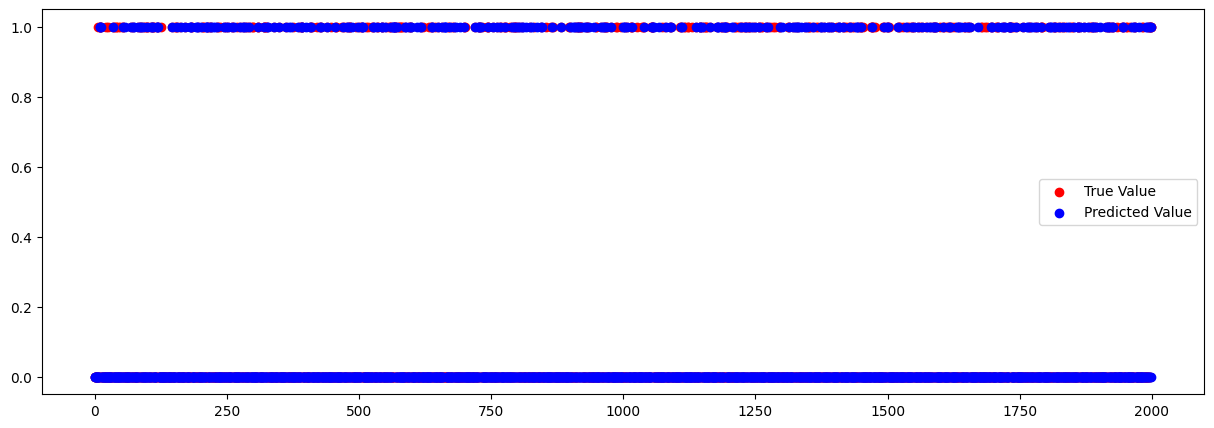

In [15]:
index = np.arange(0,len(y_test))
fig,ax = plt.subplots(1,1,figsize=(15,5))
plt.scatter(index,y_test,c="red",label = 'True Value')
plt.scatter(index,rfc_predict,c="blue", label = 'Predicted Value')

plt.legend()
plt.show()

In [16]:
New_example=np.array([502,'France','Female',42,8,159660.80,3,1,0,113931.57])
encoded=LabelEncoder().fit_transform(New_example)
# encoded = sc.transform(encoded)
encoded=encoded.reshape(1,-1)
new_pred=rfc.predict(encoded)
print(new_pred)

[1]


In [17]:
import pickle

In [1]:
filename = 'trained_model.sav'
pickle.dump(rfc,open(filename,'wb'))

NameError: name 'pickle' is not defined

In [19]:
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [20]:
New_example=np.array([502,'France','Female',42,8,159660.80,3,1,0,113931.57])
encoded=LabelEncoder().fit_transform(New_example)
# encoded = sc.transform(encoded)
encoded=encoded.reshape(1,-1)
new_pred=loaded_model.predict(encoded)
print(new_pred)

[1]
